# Load necessary Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [42]:
df = pd.read_csv("sales_data.csv", index_col = 0)

In [43]:
df

,order_id,date,customer_id,product_id,quantity,price
0,1,2023-01-01,101,501,2,15.0
1,2,2023-01-02,102,502,1,25.0
2,3,2023-01-03,101,503,1,45.0
3,4,2023-02-01,103,501,3,15.0
4,5,2023-02-10,104,504,2,35.0
5,6,2023-03-05,105,505,5,10.0
6,7,2023-03-15,101,506,2,20.0
7,8,2023-04-01,102,507,4,30.0
8,9,2023-05-01,106,508,3,25.0
9,10,2023-06-01,107,509,2,50.0


In [44]:
df.shape

(10, 6)

# **Data Cleaning**

# Handling Missing values

In [45]:
df.isnull().sum()

order_id       0
date           0
customer_id    0
product_id     0
quantity       0
price          0
dtype: int64

**No missing values found**

# Checking Data types

In [46]:
df.dtypes

order_id         int64
date            object
customer_id      int64
product_id       int64
quantity         int64
price          float64
dtype: object

In [47]:
# Ensuring date type is appropriate
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [48]:
df.dtypes

order_id                int64
date           datetime64[ns]
customer_id             int64
product_id              int64
quantity                int64
price                 float64
dtype: object

# **Exploratory Data Analysis (EDA)**

1. Calculate the total sales (quantity * price) for each order

In [49]:
df['total_sales'] = df['quantity'] * df['price']
df

,order_id,date,customer_id,product_id,quantity,price,total_sales
0,1,2023-01-01,101,501,2,15.0,30.0
1,2,2023-01-02,102,502,1,25.0,25.0
2,3,2023-01-03,101,503,1,45.0,45.0
3,4,2023-02-01,103,501,3,15.0,45.0
4,5,2023-02-10,104,504,2,35.0,70.0
5,6,2023-03-05,105,505,5,10.0,50.0
6,7,2023-03-15,101,506,2,20.0,40.0
7,8,2023-04-01,102,507,4,30.0,120.0
8,9,2023-05-01,106,508,3,25.0,75.0
9,10,2023-06-01,107,509,2,50.0,100.0


2. Determine the top 5 products by total sales

In [50]:
df.groupby('product_id')['total_sales'].sum().sort_values(ascending=False).head(5)

product_id
507    120.0
509    100.0
501     75.0
508     75.0
504     70.0
Name: total_sales, dtype: float64

3. Identify the trend in sales over time

In [51]:
df['month'] = df['date'].dt.to_period('M')
df.groupby('month')['total_sales'].sum()


month
2023-01    100.0
2023-02    115.0
2023-03     90.0
2023-04    120.0
2023-05     75.0
2023-06    100.0
Freq: M, Name: total_sales, dtype: float64

4. Plot a bar chart showing the top 5 products by total sales

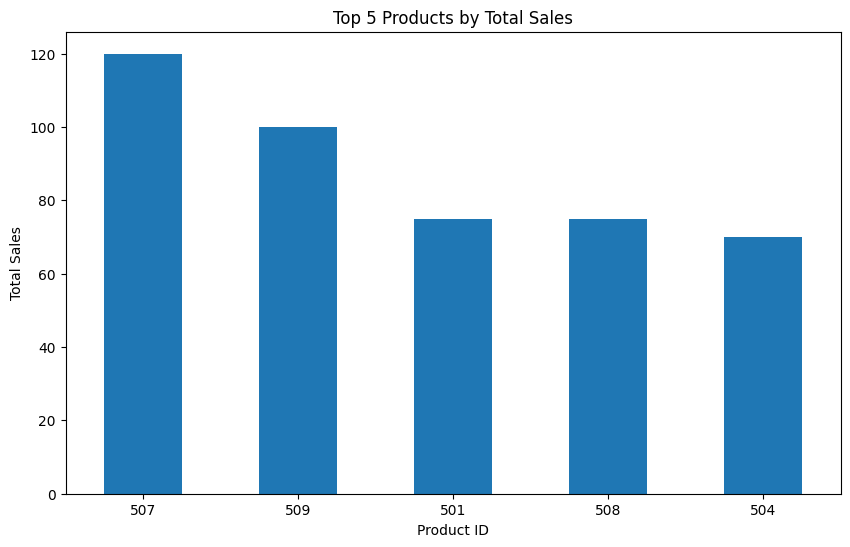

In [52]:
top_products = df.groupby('product_id')['total_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

# **Advanced Analysis:**

Calculate the average order value (AOV)

In [53]:
average_order_value = df['total_sales'].mean()
print(f"Average Order Value (AOV): ${average_order_value:.2f}")

Average Order Value (AOV): $60.00


Determine the repeat purchase rate

In [54]:
customer_purchase_counts = df['customer_id'].value_counts() #Counts the number of purchase per customer
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count() #identifies custumores with more than one purchase
total_customers = df['customer_id'].nunique() #calculates the total number of unique customers
repeat_purchase_rate = (repeat_customers / total_customers) * 100  #calculate the repeat purchase rate
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")

Repeat Purchase Rate: 28.57%
